In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

src_path = os.getcwd()[0:-4]

text_font = 20

In [87]:
color_list = ['#094A74', '#EEB140', '#E45854']

In [88]:
def axis_decor(ax, text_font):

    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)

    ax.tick_params(axis='both', which='major', labelsize=text_font, length=15, width=3)
    ax.tick_params(axis='both', which='minor', labelsize=text_font, length=10, width=3)

In [89]:
df = pd.read_csv(src_path + 'data/bias_data.csv')

df.columns

Index(['title_full', 'title', 'title_slug', 'url', 'category', 'bias_rating',
       'factual_reporting', 'country', 'press_freedom_rating', 'media_type',
       'traffic/popularity', 'mbfc_credibility_rating',
       'mbfc’s_country_freedom_rating', 'mbfc’s_freedom_rating',
       'press_freedom_rank', 'world_press_freedom_rank',
       'mbfc’s_country_freedom_rank', 'mbfc’s_country_freedom_profile',
       'press_freedom_rating_', 'mbfc_country_freedom_rating', 'reasoning',
       '_world_press_freedom_rank', 'questionable_reasoning'],
      dtype='object')

In [92]:
df['country'].unique()

array(['USA', 'Slovenia', 'United States', 'Philippines', 'South Africa',
       'France', 'Italy', 'Romania', 'United Kingdom', 'Netherlands',
       'Cyprus', 'South Korea', 'USA (44/180 Press Freedom)', 'Hong Kong',
       'Australia', 'Tunisia', 'United Arab Emirates', 'Canada',
       'Singapore', 'Belgium', 'Indonesia', 'Germany', 'Puerto Rico/USA',
       'Estonia', 'Israel', 'Austria', 'Japan', 'Lithuania',
       'USA (45/180 Press Freedom)', 'India', nan, 'New Zealand',
       'Malaysia', 'Guam (US Territory)', 'France (34/180 Press Freedom)',
       'Ireland', 'Japan (67/180 Press Freedom)',
       'Australia (26/180 Press Freedom)', 'Jordan', 'Mexico', 'Belarus',
       'Finland', 'Sweden', 'China', 'Latvia', 'Cambodia', 'Sri Lanka',
       'Qatar', 'France/Germany', 'Ukraine', 'Taiwan', 'Columbia', 'USA|',
       'Uganda', 'Kenya', 'Pakistan', 'Austria (18/180 Press Freedom)',
       'Egypt', 'Spain', 'Beligium', 'Poland', 'Switzerland', 'Iceland',
       'Croatia', 'Argen

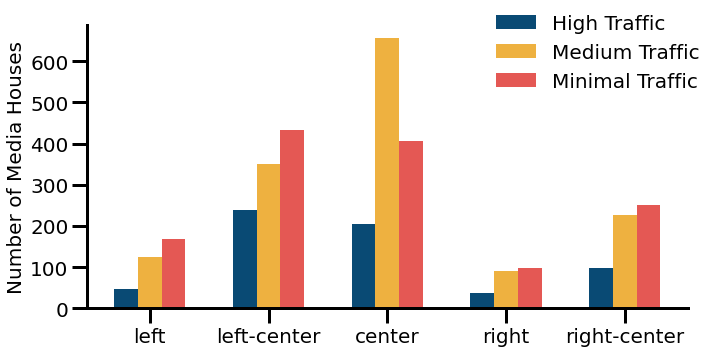

In [93]:
# mediahouse_category = list(df['category'].unique())
mediahouse_category = ['left', 'leftcenter',  'center', 'right', 'right-center']

traffic_status = [
    ['High Traffic', 'High\xa0Traffic', 'High Traffic (Social Media)', 'High Traffic (when online)', 'HIGH\xa0Traffic'],
    ['Medium Traffic', 'MediumTraffic', 'Medium', 'Medium\xa0Traffic'],
    ['Minimal Traffic', 'Minimal\xa0Traffic', 'Mimimal Traffic', 'Minmal Traffic', 'MinimalTraffic']
]

traffic_data_category = np.zeros((3,5))


for mh, mh_cat in enumerate(mediahouse_category):
    temp_df = df[df['category'] == mh_cat]

    for i in range(3):
        for j in range(len(traffic_status[i])):
            traffic_data_category[i, mh] += len(temp_df[temp_df['traffic/popularity'] == traffic_status[i][j]])



mediahouse_category[1] = 'left-center'
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(mediahouse_category))


ax.bar(x-0.2, traffic_data_category[0, :], width= 0.2, label='High Traffic', color= color_list[0])
ax.bar(x, traffic_data_category[1, :], width = 0.2, label='Medium Traffic', color= color_list[1])
ax.bar(x+0.2, traffic_data_category[2, :], width = 0.2, label='Minimal Traffic', color= color_list[2])


ax.set_ylabel('Number of Media Houses', fontsize=text_font)
ax.set_xticks(x, mediahouse_category)
axis_decor(ax, text_font)


plt.legend(frameon=False, fontsize=text_font, loc='upper right', bbox_to_anchor=(0.85, 0.9, 0.2, 0.2))
plt.tight_layout()

plt.savefig(src_path + 'figures/traffic_category.png', dpi=300, bbox_inches='tight', format='png')

plt.show()
plt.close()
